In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
# Reading in the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Creating a copy of the training set for data exploration
df_exp = train

### Checks:
1. What is the shape of the data-set? Display a few rows of the dataset
2. Display the dataset information?
2. What is the target variable?
3. List and assess which variables have null values that need to be taken care off.
4. Look at all the variables individually
 - Check if the variable is discrete or continuous?
 - Check if variable is nominal or ordinal
 - If discrete check for unique values
 - If continuous, take a look at the descriptive stats
 - If continuous, take a look at the distribution of the variable.
 - Get a sense of correlation between the attribute and target variable.

In [7]:
# DATASET SHAPE
df_exp.shape

(891, 12)

In [8]:
df_exp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# DATASET INFO DISPLAY
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
# TARGET VARIABLE 
target = df_exp['Survived']
df_exp['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
# lIST OF VARIABLE WITH NULL VALUES
nulls = ["Age", "Cabin", "Embarked"]

### ASSESSMENT OF INDIVIDUAL ATTRIBUTE

#### PassangerID

In [12]:
# This attribute does not seem to hold any predictive value towards the target. These are just IDs of the passengers. 

#### Pclass

In [13]:
df_exp['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [14]:
# Variable is categorical and seems to be ordinal with Pclass=1 being better than Pclass=2 and then Pclass=3

In [15]:
df_exp['Pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

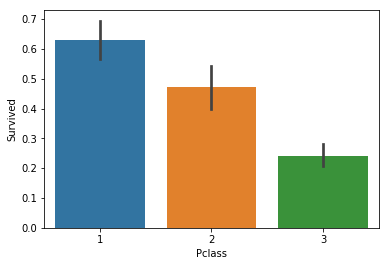

In [16]:
sns.barplot(x='Pclass', y='Survived', data=df_exp)
plt.show()

In [17]:
# Correlation between Pclass and target variable
df_exp['Pclass'].corr(df_exp['Survived'])

-0.3384810359610147

#### Name

In [18]:
# Like PassengerID, the name seems to be unique. There is good chance that a feature can be constructed
# using the designations (Eg - Mr., Mrs, Miss, etc)
# We will explore this later.

#### Sex

In [19]:
df_exp['Sex'].unique()

array(['male', 'female'], dtype=object)

In [20]:
# This variable is categorical.

In [21]:
df_exp['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

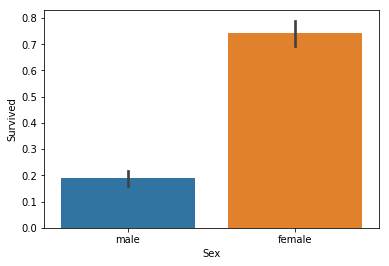

In [22]:
sns.barplot(x='Sex', y='Survived', data=df_exp)
plt.show()

In [23]:
# The above shows that the proportion of females that survived were much higher than the males.
# So the chances of survival if you are a female would go up compared to if you are a male. 

#### Age

In [24]:
df_exp['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
# This variable is continous. 

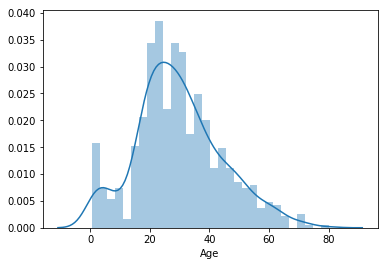

In [26]:
# df_exp['Age'].hist(bins=30, edgecolor='b')
sns.distplot(df_exp[df_exp['Age'].notnull()]['Age'], bins=30)
plt.show()

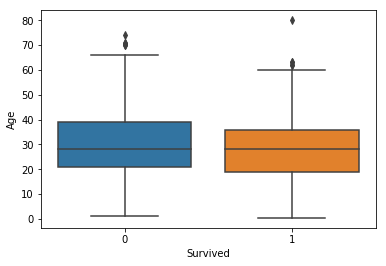

In [27]:
sns.boxplot(x='Survived', y='Age', data=df_exp)
# sns.swarmplot(x='Survived', y='Age', data=df_exp)
plt.show()

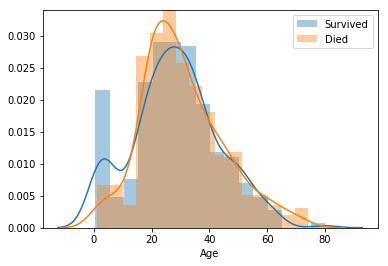

In [28]:
fltr1 = (df_exp['Survived']==1)
fltr2 = (df_exp['Survived']==0)
sns.distplot(df_exp[fltr1 & df_exp['Age'].notnull()]['Age'], label='Survived')
sns.distplot(df_exp[fltr2 & df_exp['Age'].notnull()]['Age'], label='Died')
plt.legend()
plt.show()

In [29]:
df_exp['Age'].corr(df_exp['Survived'])

-0.07722109457217764

In [30]:
# Takeaways
# The age distribution for 'Survived' and 'Died' look very similar.
# From the spike in the 'Survived' histogram it seems that chances of survival are higher if the passenger 
# is in the infant to toddler ages.
# It would be good to discretize this variable based on the histograms above. 

#### SibSp

In [31]:
df_exp['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [32]:
df_exp['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [33]:
# This is a discrete variable

In [34]:
df_exp['SibSp'].value_counts().sort_index()

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

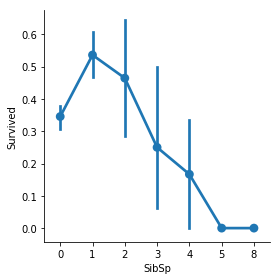

In [35]:
sns.factorplot(x='SibSp', y='Survived', data=df_exp)
plt.show()

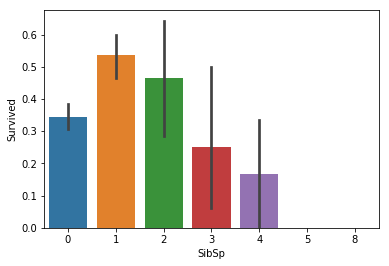

In [36]:
sns.barplot(x='SibSp', y='Survived', data=df_exp)
plt.show()

In [37]:
df_exp['SibSp'].corr(df_exp['Survived'])

-0.03532249888573558

#### Parch

In [38]:
df_exp['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [39]:
df_exp['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [40]:
# This is a discrete variable

In [41]:
df_exp['Parch'].value_counts().sort_index()

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

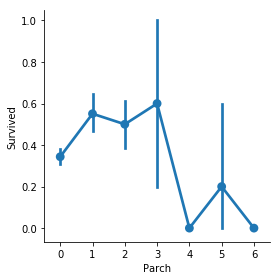

In [42]:
sns.factorplot(x='Parch', y='Survived', data=df_exp)
plt.show()

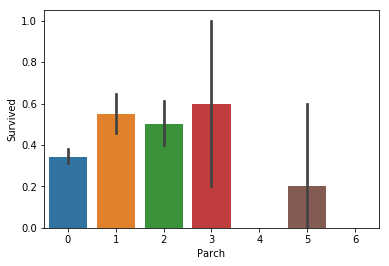

In [43]:
sns.barplot(x='Parch', y='Survived', data=df_exp)
plt.show()

In [44]:
df_exp['Parch'].corr(df_exp['Survived'])

0.08162940708348365

In [45]:
# It seems as if passengers with no parents and children have a lower chance of surviving.
# on the other hand passangers with 1 or 2 parent or child have 50% or more chance of survival. 
# The attributes 'SibSp' and 'Parch' can be combined to get the family size which will adequately get info from both attribues.
# Family size can also be further discretized into '1', '2', and '>2'

#### Ticket

In [46]:
# Like PassengerID, the Ticket number seems to be unique.
# The prefix of the ticket number could be taken and explored for repition.
# We will do this later.

#### Fare

In [47]:
df_exp["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [48]:
# This is a continuous variable

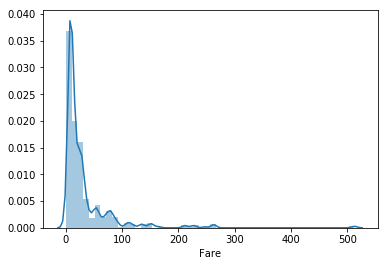

In [49]:
sns.distplot(df_exp['Fare'])
plt.show()

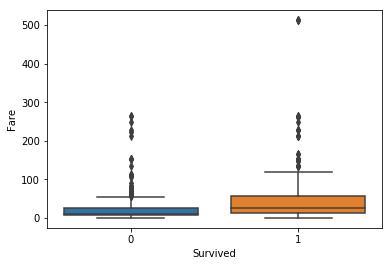

In [50]:
sns.boxplot(x='Survived', y='Fare', data=df_exp)
plt.show()

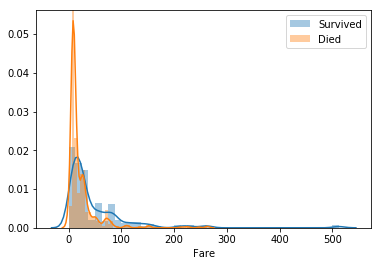

In [51]:
sns.distplot(df_exp[df_exp['Survived']==1]['Fare'], label='Survived')
sns.distplot(df_exp[df_exp['Survived']==0]['Fare'], label='Died')
plt.legend()
plt.show()

In [52]:
df_exp['Fare'].corr(df_exp['Survived'])

0.2573065223849623

#### Cabin

In [53]:
df_exp['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [54]:
# This variable is categorical.

In [55]:
df_exp['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
E101           3
D              3
F33            3
F2             3
E33            2
C124           2
D35            2
E24            2
C78            2
C92            2
C93            2
B22            2
D26            2
D20            2
E67            2
B18            2
B58 B60        2
F4             2
D17            2
B49            2
B51 B53 B55    2
C126           2
C125           2
B20            2
B5             2
E25            2
              ..
B78            1
A5             1
C70            1
F E69          1
E12            1
C91            1
C103           1
B71            1
C30            1
A19            1
C87            1
C32            1
D9             1
D48            1
D46            1
D45            1
D21            1
B94            1
C85            1
T              1
C90            1
D28            1
E50            1
B39            1
A31            1
E68            1
C101           1
E31           

In [56]:
percent_missing = 100*(1-(df_exp['Cabin'].count()/df_exp.shape[0]))
percent_missing

77.1043771043771

In [57]:
# More than 75% of the data is missing. This variable can be conveniently eliminated.
# There is a chance for the cabin deck(prefixes A, B, C, etc.) to be associated to the survival. 
# This will be explored later to see if the model accuracy can be further enhanced. 

#### Embarked

In [58]:
df_exp['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [59]:
# This variable is categorical. 

In [60]:
 df_exp['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

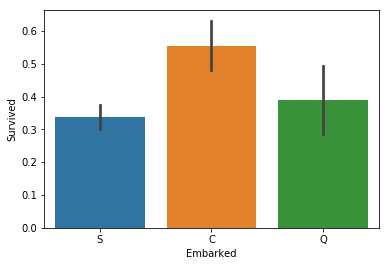

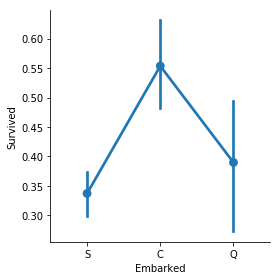

In [61]:
sns.barplot(x='Embarked', y='Survived', data=df_exp)
plt.show()
sns.factorplot(x='Embarked', y='Survived', data=df_exp)
plt.show()

In [62]:
# Seems like there is low chances of survival for the passenger of Embarked 'S'
# The passenger has a little greater than 50% of survival chances with Embaked 'C'
# Embarked 'Q' survival rate seems to be low but the volume of data isn't enough to make the decision. 

#### Checking for correlations among attributes

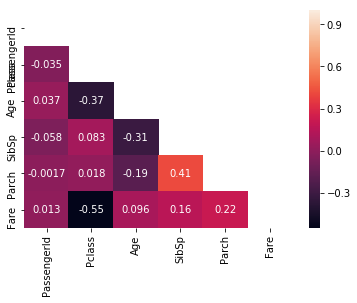

In [63]:
corr = df_exp.corr().drop("Survived").drop("Survived", axis=1)
mask = np.ones_like(corr)
mask = np.triu(mask)
sns.heatmap(corr, annot=True, mask=mask)
plt.show()